In [20]:
import pandas as pd

# Load dataset
df = pd.read_csv("ab_data.csv")

# Preview first rows
print("Sample Data:\n")
display(df)

# Conversion rate by group
summary = df.groupby("group")["converted"].agg(["count","sum","mean"])
summary.columns = ["Visitors","Conversions","Conversion Rate"]

print("\nSummary by Group:\n")
display(summary)


Sample Data:



,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0



Summary by Group:



,Visitors,Conversions,Conversion Rate
group,,,
control,147202,17723,0.120399
treatment,147276,17514,0.118920


#  Hypothesis Statement

### **Null Hypothesis ($H_0$):**
$$H_0: p_{new} \leq p_{old}$$
> **Interpretation:** The new page does **not** convert better than the old page.

### **Alternative Hypothesis ($H_1$):**
$$H_1: p_{new} > p_{old}$$
> **Interpretation:** The new page **converts better** than the old page.

---
**Statistical Test:** This is a **one-tailed two-proportion Z-test**.

In [8]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Murtuza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
from statsmodels.stats.proportion import proportions_ztest

# Conversion counts
conv_old = df[df['group']=="control"]["converted"].sum()
conv_new = df[df['group']=="treatment"]["converted"].sum()

# Sample sizes
n_old = df[df['group']=="control"].shape[0]
n_new = df[df['group']=="treatment"].shape[0]

# Two-proportion Z-test (one-tailed: new > old)
z_score, p_value = proportions_ztest(
    count=[conv_new, conv_old],
    nobs=[n_new, n_old],
    alternative='larger'
)

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.6f}")

Z-score: -1.2369
P-value: 0.891942


Control 95% CI: (0.11873674000172378, 0.12206161871622843)
Treatment 95% CI: (0.11726641320754189, 0.12057274592225523)


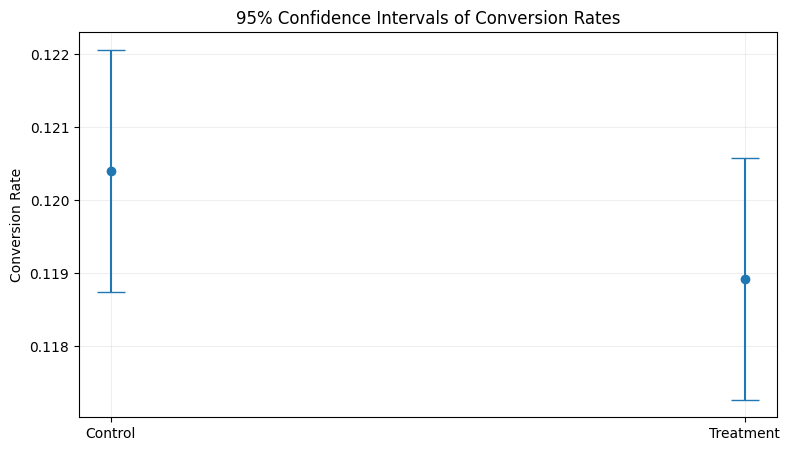

In [22]:
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

# Conversion rates
p_old = conv_old / n_old
p_new = conv_new / n_new

# 95% confidence intervals
ci_old = sms.proportion_confint(conv_old, n_old, alpha=0.05)
ci_new = sms.proportion_confint(conv_new, n_new, alpha=0.05)

print("Control 95% CI:", ci_old)
print("Treatment 95% CI:", ci_new)

# Plot
plt.figure(figsize=(9,5))
plt.errorbar(
    x=[0,1],
    y=[p_old, p_new],
    yerr=[
        [p_old-ci_old[0], p_new-ci_new[0]],
        [ci_old[1]-p_old, ci_new[1]-p_new]
    ],
    fmt='o',
    capsize=10
)
plt.xticks([0,1], ["Control","Treatment"])
plt.ylabel("Conversion Rate")
plt.title("95% Confidence Intervals of Conversion Rates")
plt.grid(alpha=0.2)
plt.show()


Since the 95% confidence intervals for the control and treatment groups overlap, there is no statistically significant difference in conversion rates between the two pages.

# 📊 Interpretation & Business Insights — AB Test Result

## 1. Conversion Performance
* **Control conversion rate:** $12.04\%$
* **Treatment conversion rate:** $11.89\%$
* **Observation:** The treatment page converts **~0.14 percentage points lower** than the control page.

## 2. Hypothesis Test Result
* **Z-score:** $-1.2369$
* **p-value:** $0.8919$
* **Conclusion:** Since $p\text{-value} > 0.05$, we **fail to reject the null hypothesis ($H_0$)**.

> 👉 **Result:** There is **no statistical evidence** that the new page converts better than the old page.

## 3. Confidence Interval Validation
* **Control 95% CI:** $[0.1187, 0.1221]$
* **Treatment 95% CI:** $[0.1173, 0.1206]$
* **Insight:** The intervals **overlap**, confirming that the difference is not statistically significant.

---

## 4. Business Recommendation
**Verdict:** Because the observed drop in conversion indicates risk without proven benefit:

* ❌ **Do NOT roll out the new page yet**
* ✅ **Keep the old page active**
* 📌 **Action Item:** Consider redesigning the new page and running a fresh experiment.